# Datasets
During the campaigns several datasets have been collected. The overview below shows the datasets available via the intake catalog for each research flight.

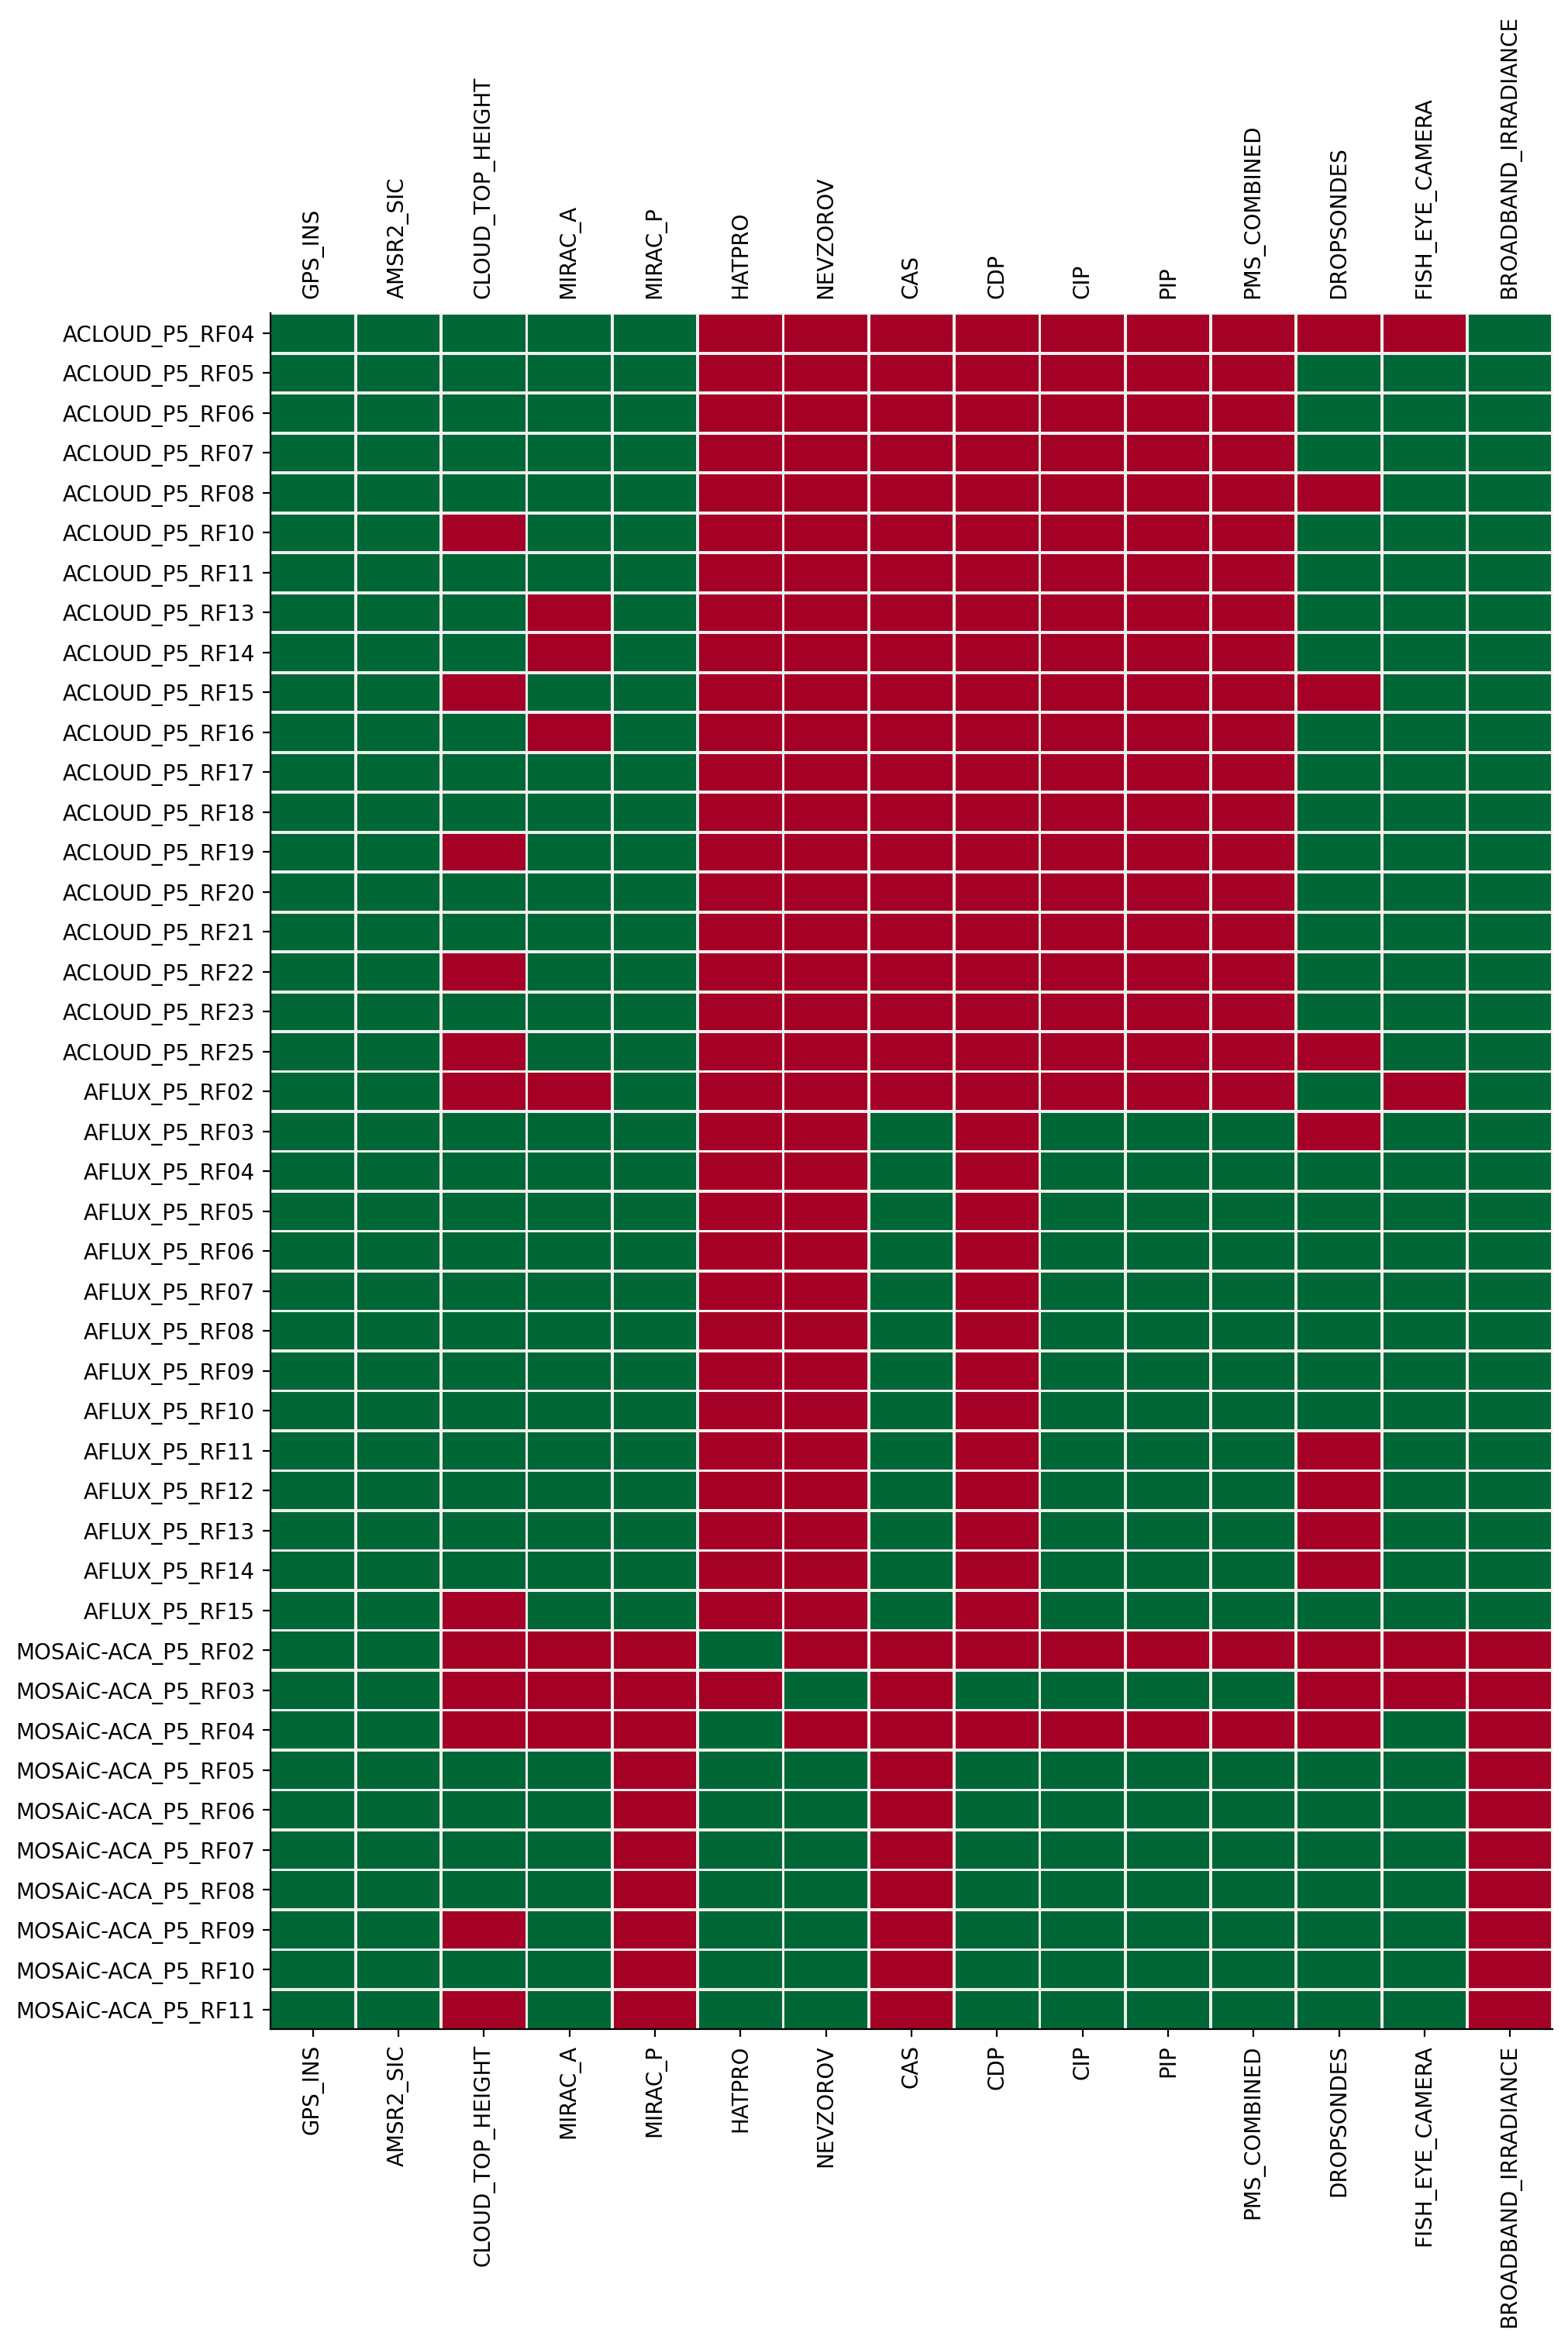

In [1]:
%matplotlib inline
import ac3airborne
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("mplstyle/book")

# load intake catalog and flight segments
cat = ac3airborne.get_intake_catalog()
meta = ac3airborne.get_flight_segments()

# store data availability in a matrix
data_availability = np.zeros(shape=(len(list(cat['P5'])),
                                    len(list(meta['P5']))))
for i, dataset in enumerate(list(cat['P5'])):
    data_availability[i, :] = np.isin(list(meta['P5']), 
                                      list(cat['P5'][dataset]))

# plot data availability
fig, ax = plt.subplots(1, 1, figsize=(10, 15), dpi=200,
                       constrained_layout=True)

ax.pcolormesh(range(data_availability.shape[0]), 
              range(data_availability.shape[1]), 
              data_availability.T, 
              shading='nearest',
              vmin=0, 
              vmax=1, 
              cmap='RdYlGn', 
              edgecolors='#eeeeee')

ax.set_xticks(range(data_availability.shape[0]))
ax.set_yticks(range(data_availability.shape[1]))

ax.set_xticklabels(list(list(cat['P5'])), rotation=90)
ax.set_yticklabels(list(list(meta['P5'])))

ax.tick_params(labeltop=True)
ax.invert_yaxis()

plt.show()